In [83]:
# standard imports
import datetime
import os
import sys


from subprocess import check_output

# third party imports
import matplotlib.pyplot as plt # MATLAB like plotting framework
import numpy as np # linear algebra
import pandas as pd # Data ETL, csv file I/O
import seaborn as sns

# src directory imports
module_path = os.path.abspath(os.path.join('src'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.helper_functions import load_dataset, ttest_by, kstest_by, CleanTextTransformer

%matplotlib inline

#### Check files in data folder

In [2]:
print(check_output(["ls", "./data"]).decode("utf-8"))

Kickstarter001.csv
Kickstarter002.csv
Kickstarter003.csv
Kickstarter004.csv
Kickstarter005.csv
Kickstarter006.csv
Kickstarter007.csv
Kickstarter008.csv
Kickstarter009.csv
Kickstarter010.csv
Kickstarter011.csv
Kickstarter012.csv
Kickstarter013.csv
Kickstarter014.csv
Kickstarter015.csv
Kickstarter016.csv
Kickstarter017.csv
Kickstarter018.csv
Kickstarter019.csv
Kickstarter020.csv
Kickstarter021.csv
Kickstarter022.csv
Kickstarter023.csv
Kickstarter024.csv
Kickstarter025.csv
Kickstarter026.csv
Kickstarter027.csv
Kickstarter028.csv
Kickstarter029.csv
Kickstarter030.csv
Kickstarter031.csv
Kickstarter032.csv
Kickstarter033.csv
Kickstarter034.csv
Kickstarter035.csv
Kickstarter036.csv
Kickstarter037.csv
Kickstarter038.csv
Kickstarter039.csv
Kickstarter040.csv
Kickstarter041.csv
Kickstarter042.csv



#### Load dataframe

In [3]:
df = load_dataset()

In [4]:
df.head()

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions
0,2081133073,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Dracula: The Kisses... Help Scary Little Girls...,Dracula: The Kisses… is an all-female producti...,8000.0,2507.0,failed,dracula-the-kisses-help-scary-little-girls-fly...,False,GB,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...",{'urls': {'web': {'discover': 'http://www.kick...,"{'background_image_opacity': 0.8, 'should_show...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
1,262077000,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Historial Women,The Power of Women and Their Contributions to ...,2000.0,19.0,failed,historial-women,False,US,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...",{'urls': {'web': {'discover': 'http://www.kick...,"{'background_image_opacity': 0.8, 'should_show...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
2,1541121253,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",The Sequel: a comedy with puppets,Our play The Sequel has a 2 week run at The Ca...,500.0,1.0,failed,the-sequel-a-comedy-with-puppets,False,GB,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...",{'urls': {'web': {'discover': 'http://www.kick...,"{'background_image_opacity': 0.8, 'should_show...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
3,489010822,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Young blind actors have a life-changing opport...,Four blind youth from Los Angeles based Theatr...,15000.0,2095.0,failed,young-blind-actors-have-a-life-changing-opport...,False,US,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...",{'urls': {'web': {'discover': 'http://www.kick...,"{'background_image_opacity': 0.8, 'should_show...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
4,702028718,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Drama School Fund,Raising money to send a young Actress to Drama...,10600.0,11.0,failed,drama-school-fund,False,GB,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...",{'urls': {'web': {'discover': 'http://www.kick...,"{'background_image_opacity': 0.8, 'should_show...",False,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172833 entries, 0 to 172832
Data columns (total 32 columns):
id                        172833 non-null int64
photo                     172833 non-null object
name                      172832 non-null object
blurb                     172821 non-null object
goal                      172833 non-null float64
pledged                   172833 non-null float64
state                     172833 non-null object
slug                      172833 non-null object
disable_communication     172833 non-null bool
country                   172833 non-null object
currency                  172833 non-null object
currency_symbol           172833 non-null object
currency_trailing_code    172833 non-null bool
deadline                  172833 non-null int64
state_changed_at          172833 non-null int64
created_at                172833 non-null int64
launched_at               172833 non-null int64
staff_pick                172833 non-null bool
backers_count   

#### Quick data overview:

This dataset has 172,833 campaigns

## Data hygeine and exploration

In [6]:
df['launched_at'] = pd.to_datetime(df['launched_at'],unit='s')
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'],unit='s')
df['created_at'] = pd.to_datetime(df['created_at'],unit='s')
df['deadline'] = pd.to_datetime(df['deadline'],unit='s')

In [7]:
df.launched_at.describe()

count                  172833
unique                 172666
top       2015-11-17 22:07:49
freq                        2
first     2009-04-24 19:52:03
last      2017-03-16 00:23:26
Name: launched_at, dtype: object

In [8]:
df['launched_at_hr'] = df['launched_at'].apply(lambda x: x.hour) + 1
df['launched_at_dow'] = df['launched_at'].apply(lambda x: x.dayofweek + 1) #Monday=1, Sunday=7
df['launched_at_mo'] = df['launched_at'].apply(lambda x: x.month)
df['launched_at_yr'] = df['launched_at'].apply(lambda x: x.year)

In [9]:
df['deadline_hr'] = df['deadline'].apply(lambda x: x.hour) + 1
df['deadline_dow'] = df['deadline'].apply(lambda x: x.dayofweek + 1) #Monday=1, Sunday=7
df['deadline_mo'] = df['deadline'].apply(lambda x: x.month)
df['deadline_yr'] = df['deadline'].apply(lambda x: x.year)

In [10]:
df['created_at_hr'] = df['created_at'].apply(lambda x: x.hour) + 1
df['created_at_dow'] = df['created_at'].apply(lambda x: x.dayofweek + 1) #Monday=1, Sunday=7
df['created_at_mo'] = df['created_at'].apply(lambda x: x.month)
df['created_at_yr'] = df['created_at'].apply(lambda x: x.year)

Simple quality check: Let's check to make sure no launch dates came after before deadline dates

In [11]:
np.any(df.deadline < df.launched_at)

False

In [12]:
df.launched_at_yr.value_counts()

2015    46280
2014    36704
2016    34242
2013    17191
2012    16267
2011     9797
2017     7813
2010     3959
2009      580
Name: launched_at_yr, dtype: int64

Let's look at growth in campaigns from 2009 to 2017

In [13]:
df['count'] = 1

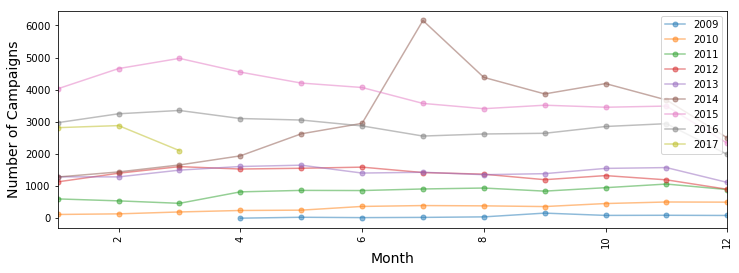

In [14]:
def plot_monthly_campaign_count(n):
    
    mth = df[df['launched_at_yr'] == n]
    mth_cnt = mth.groupby('launched_at_mo').count()['count']
    mth_cnt.plot(marker='o', markersize=5, alpha=.5, rot=90)

fig = plt.figure(figsize=(12, 4))
for i in range(2009, 2018):
    plot_monthly_campaign_count(i)
plt.ylabel('Number of Campaigns', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.legend(range(2009, 2018))
plt.show()

Peak campaign count occured in the month of july in 2014. Not really any seasonality is readily apparent.

In [15]:
pd.crosstab(df.launched_at_mo, df.launched_at_yr)

launched_at_yr,2009,2010,2011,2012,2013,2014,2015,2016,2017
launched_at_mo,,,,,,,,,
1,0,121,605,1135,1292,1286,4029,2976,2821
2,0,140,544,1404,1290,1444,4659,3253,2885
3,0,199,468,1609,1500,1661,4976,3356,2107
4,6,245,824,1534,1613,1944,4549,3105,0
5,34,255,870,1558,1654,2629,4208,3058,0
6,23,371,865,1593,1409,2955,4070,2875,0
7,30,398,914,1425,1434,6154,3575,2560,0
8,46,389,943,1374,1358,4385,3411,2624,0
9,163,367,847,1203,1390,3870,3519,2646,0


## Create a label/target

In [17]:
df.state.value_counts()

failed        82718
successful    73810
canceled      11588
live           3882
suspended       835
Name: state, dtype: int64

Roughly balanced classes... nice!

In [18]:
df['success'] = (df['state'] == 'successful')

In [19]:
df.success.value_counts()

False    99023
True     73810
Name: success, dtype: int64

While we are at it let's drop live, suspended or cancelled campaign's from the dataset. You may wonder whether a campaign that was canceled or suspended would have suceeded but I can't see these providing our model with much information. Maybe in the future, we try a multiclass model(more than 2 target values) to predict cancelation or suspention. Just for fun, lets create a test set with the live campaigns for predicting whether or not they are likely to succeed or fail

In [20]:
test_live = df[df.state == 'live']

In [21]:
test_live.shape

(3882, 46)

In [22]:
df = df[df['state'].isin(['successful', 'failed'])]

In [23]:
df.state.value_counts()

failed        82718
successful    73810
Name: state, dtype: int64

In [24]:
df.success.value_counts()

False    82718
True     73810
Name: success, dtype: int64

In [25]:
df.staff_pick.value_counts()

False    135593
True      20935
Name: staff_pick, dtype: int64

In [26]:
staff_picked = df.staff_pick.value_counts()
print("Not so nice, ~ %g%% are staff picked" % (staff_picked[1] * 100 / staff_picked.sum()).round())

Not so nice, ~ 13% are staff picked


In [27]:
pd.crosstab(df.staff_pick, df.success)

success,False,True
staff_pick,,
False,79279,56314
True,3439,17496


### Basic Stats

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,156528.0,1.075294e+09,6.188733e+08,18520.000000,538407189.0,1.078533e+09,1.610490e+09,2.147476e+09
goal,156528.0,4.467307e+04,1.108518e+06,0.010000,2000.0,5.000000e+03,1.500000e+04,1.000000e+08
pledged,156528.0,1.285096e+04,1.245160e+05,0.000000,50.0,1.046000e+03,5.497737e+03,2.033899e+07
backers_count,156528.0,1.473830e+02,1.285333e+03,0.000000,2.0,1.900000e+01,7.500000e+01,2.193820e+05
static_usd_rate,156528.0,1.027985e+00,1.929297e-01,0.045635,1.0,1.000000e+00,1.000000e+00,1.716408e+00
usd_pledged,156528.0,1.239698e+04,1.223180e+05,0.000000,50.0,1.057000e+03,5.505000e+03,2.033899e+07
launched_at_hr,156528.0,1.464891e+01,7.157756e+00,1.000000,9.0,1.700000e+01,2.000000e+01,2.400000e+01
launched_at_dow,156528.0,3.366771e+00,1.772662e+00,1.000000,2.0,3.000000e+00,5.000000e+00,7.000000e+00
launched_at_mo,156528.0,6.428524e+00,3.365714e+00,1.000000,4.0,7.000000e+00,9.000000e+00,1.200000e+01
launched_at_yr,156528.0,2.014130e+03,1.666356e+00,2009.000000,2013.0,2.014000e+03,2.015000e+03,2.017000e+03


In [29]:
df.corr()

,id,goal,pledged,disable_communication,currency_trailing_code,staff_pick,backers_count,static_usd_rate,usd_pledged,spotlight,...,deadline_hr,deadline_dow,deadline_mo,deadline_yr,created_at_hr,created_at_dow,created_at_mo,created_at_yr,count,success
id,1.000000,0.001855,0.001044,NaN,0.002864,0.000903,0.001129,-0.002425,0.000745,-0.000266,...,0.000490,-0.001754,0.001223,-0.001003,-0.001734,0.000494,-0.004499,-0.001293,NaN,-0.000266
goal,0.001855,1.000000,0.009500,NaN,-0.000260,-0.006602,0.007792,-0.012211,0.008937,-0.028857,...,0.003298,-0.003937,-0.001196,0.016484,-0.001331,0.006647,0.000370,0.015454,NaN,-0.028857
pledged,0.001044,0.009500,1.000000,NaN,0.017319,0.135431,0.732125,-0.033868,0.979246,0.098150,...,-0.014693,0.003431,0.001600,0.021726,0.000788,-0.008555,0.001407,0.017598,NaN,0.098150
disable_communication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency_trailing_code,0.002864,-0.000260,0.017319,NaN,1.000000,0.008817,0.010037,-0.725085,0.008423,0.049079,...,-0.123715,-0.010192,-0.004032,-0.198666,-0.045797,0.005453,-0.012779,-0.203314,NaN,0.049079
staff_pick,0.000903,-0.006602,0.135431,NaN,0.008817,1.000000,0.148680,0.012244,0.134698,0.286664,...,-0.033307,-0.015661,0.014363,-0.047078,0.020622,-0.016131,0.007259,-0.056749,NaN,0.286664
backers_count,0.001129,0.007792,0.732125,NaN,0.010037,0.148680,1.000000,-0.002236,0.749957,0.108666,...,-0.018297,0.002753,0.000987,0.010513,0.001806,-0.004409,0.000202,0.006193,NaN,0.108666
static_usd_rate,-0.002425,-0.012211,-0.033868,NaN,-0.725085,0.012244,-0.002236,1.000000,-0.001859,0.001774,...,0.085879,0.008743,0.008908,-0.015678,0.054158,0.002064,-0.013459,-0.009976,NaN,0.001774
usd_pledged,0.000745,0.008937,0.979246,NaN,0.008423,0.134698,0.749957,-0.001859,1.000000,0.096416,...,-0.014881,0.003862,0.001114,0.016886,0.002173,-0.008357,-0.000554,0.012897,NaN,0.096416
spotlight,-0.000266,-0.028857,0.098150,NaN,0.049079,0.286664,0.108666,0.001774,0.096416,1.000000,...,-0.070798,-0.027505,-0.002189,-0.146228,0.020330,-0.018291,-0.015445,-0.149378,NaN,1.000000


Let's check out categories

In [30]:
df.category[20]

{'color': 16743775,
 'id': 285,
 'name': 'Plays',
 'parent_id': 17,
 'position': 6,
 'slug': 'theater/plays',
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/theater/plays'}}}

In [31]:
df['category'][0]['slug']

'theater/plays'

In [32]:
df['type'] = df['category'].apply(lambda x: x['slug'].split('/')[0])
df['subtype'] = df['category'].apply(lambda x: x['slug'].split('/')[1])

/Users/gmacmillan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/gmacmillan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [33]:
df.type.value_counts()

music           27146
film & video    25831
publishing      19010
technology      17075
art             16043
games           11185
food             9751
fashion          8423
design           6299
comics           3989
photography      3604
crafts           3116
journalism       2247
theater          1674
dance            1135
Name: type, dtype: int64

In [34]:
df.subtype.value_counts()

narrative film       3984
webseries            3970
country & folk       3914
apps                 3880
apparel              3870
shorts               3870
fiction              3869
nonfiction           3861
children's books     3857
indie rock           3825
video games          3741
rock                 3698
documentary          3697
web                  3639
tabletop games       3632
product design       3589
hip-hop              3160
pop                  2801
painting             2752
public art           2674
hardware             2645
mixed media          2284
illustration         2280
software             2244
classical music      2223
art books            2147
restaurants          2129
animation            1932
accessories          1901
performance art      1865
                     ... 
space exploration     195
textiles              190
fabrication tools     179
movie theaters        177
bacon                 169
puzzles               169
stationery            164
printing    

In [35]:
print("Number of types: ", len(df.type.unique()))
print("Number of subtypes: ", len(df.subtype.unique()))

Number of types:  15
Number of subtypes:  143


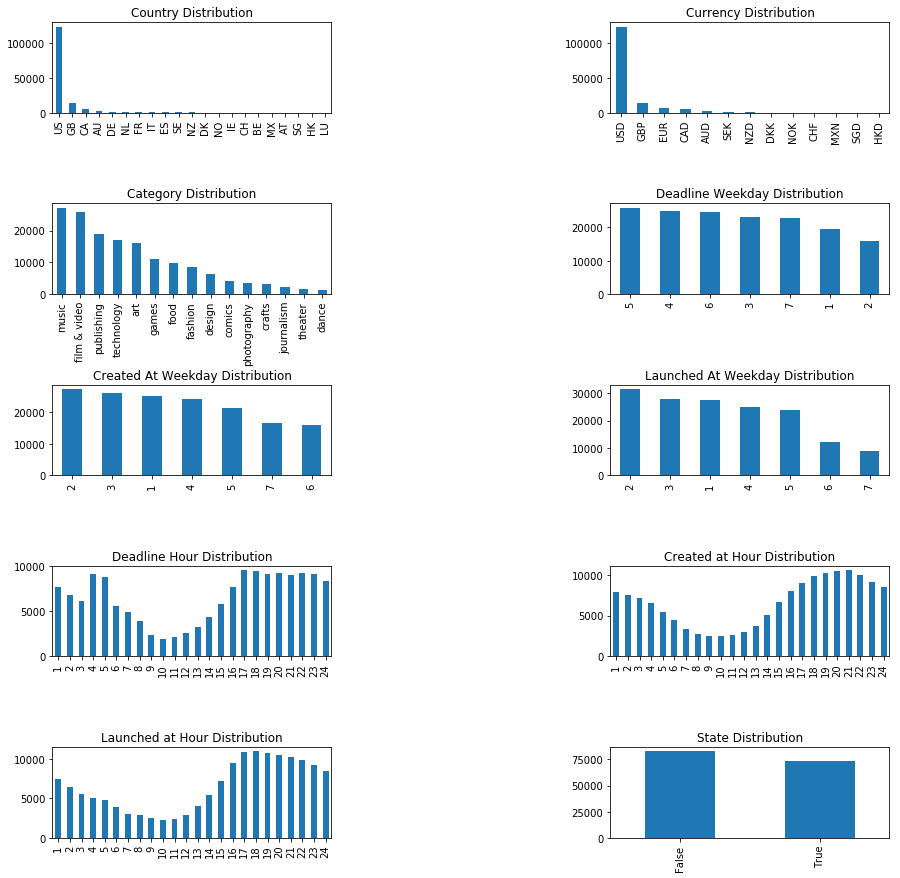

In [36]:
fig, axes = plt.subplots(nrows=5, ncols=2)
fig.subplots_adjust(hspace=1, wspace = 1)

df['country'].value_counts().plot(kind = 'bar',ax=axes[0,0], title = 'Country Distribution', figsize=(15,15))
df['currency'].value_counts().plot(kind = 'bar',ax=axes[0,1], title = 'Currency Distribution', figsize=(15,15))
df['type'].value_counts().plot(kind = 'bar',ax=axes[1,0], title = 'Category Distribution', figsize=(15,15))
df['deadline_dow'].value_counts().plot(kind = 'bar',ax=axes[1,1], title = 'Deadline Weekday Distribution', figsize=(15,15))
df['created_at_dow'].value_counts().plot(kind = 'bar',ax=axes[2,0], title = 'Created At Weekday Distribution', figsize=(15,15))
df['launched_at_dow'].value_counts().plot(kind = 'bar',ax=axes[2,1], title = 'Launched At Weekday Distribution', figsize=(15,15))
df['deadline_hr'].value_counts().sort_index().plot(kind = 'bar',ax=axes[3,0], title = 'Deadline Hour Distribution', figsize=(15,15))
df['created_at_hr'].value_counts().sort_index().plot(kind = 'bar',ax=axes[3,1], title = 'Created at Hour Distribution', figsize=(15,15))
df['launched_at_hr'].value_counts().sort_index().plot(kind = 'bar',ax=axes[4,0], title = 'Launched at Hour Distribution', figsize=(15,15))
df['success'].value_counts().plot(kind = 'bar',ax=axes[4,1], title = 'State Distribution', figsize=(15,15))

Lets look at missing values briefly

In [37]:
df.apply(lambda x: np.sum(pd.isnull(x)))

id                             0
photo                          0
name                           1
blurb                          1
goal                           0
pledged                        0
state                          0
slug                           0
disable_communication          0
country                        0
currency                       0
currency_symbol                0
currency_trailing_code         0
deadline                       0
state_changed_at               0
created_at                     0
launched_at                    0
staff_pick                     0
backers_count                  0
static_usd_rate                0
usd_pledged                    0
creator                        0
location                     593
category                       0
profile                        0
spotlight                      0
urls                           0
source_url                     0
friends                   156431
is_starred                156431
is_backing

In [38]:
pd.crosstab(df.friends, df.success)

success,True
friends,
[],97


In [39]:
pd.crosstab(df.is_backing, df.success)

success,True
is_backing,
False,97


In [40]:
pd.crosstab(df.is_starred, df.success)

success,True
is_starred,
False,97


In [41]:
pd.crosstab(df.permissions, df.success)

success,True
permissions,
[],97


Out of campaigns with success = true, 97 have non-null values in the friends, is_backing, is_starred and permissions columns. The vast majority are nans and of those that are nans 83 have success = False. These columns are telling me absolutely nothing.

In [42]:
df.drop(['permissions', 'is_starred', 'is_backing', 'friends'], axis = 1, inplace = True)

/Users/gmacmillan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


We already have a column with the country abreviation and for this case study I don't want to get any more granular than that. So I will ignore the location column for now.

In [43]:
df.drop(['location'], axis = 1, inplace = True)

/Users/gmacmillan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


State_changed_at is column describing when the campaign changed state to either successful, failed, cancelled or suspended. Since this will not be known ahead of time for a given campaign, this is not a good datetime to use in the following look at the time differences between our dates.

* creation and launch
* launch and deadline

In [44]:
df['launched-created'] = (df.launched_at - df.created_at).dt.components.days
df['deadline-launched'] = (df.deadline - df.launched_at).dt.components.days

/Users/gmacmillan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/gmacmillan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [45]:
df['launched-created'].describe()

count    156528.000000
mean         42.657959
std         107.894318
min           0.000000
25%           2.000000
50%          10.000000
75%          34.000000
max        2233.000000
Name: launched-created, dtype: float64

In [46]:
df['launched-created'].median()

10.0

In [47]:
df['deadline-launched'].describe()

count    156528.000000
mean         33.398178
std          12.278949
min           1.000000
25%          30.000000
50%          30.000000
75%          35.000000
max          91.000000
Name: deadline-launched, dtype: float64

In [48]:
df['deadline-launched'].median()

30.0

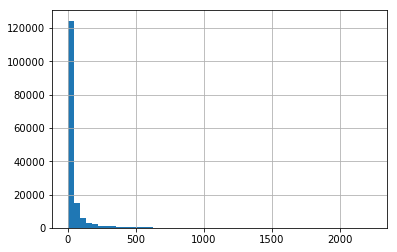

In [49]:
df['launched-created'].hist(bins=50)

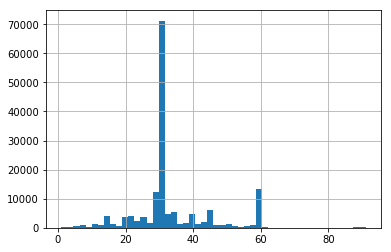

In [50]:
df['deadline-launched'].hist(bins=50)

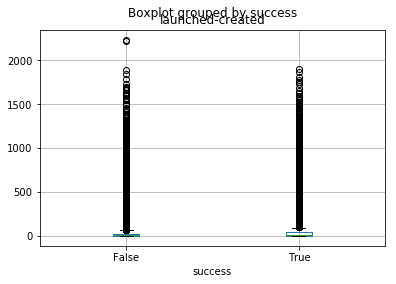

In [51]:
df.boxplot('launched-created', by='success')

Let's perform a simple KS test designed to test a simple hypothesis P = P0 for a given specified distribution P0. In this case, the difference between distribution of succesful campaigns to unnsuccesful ones by metric of days between (deadline and launch) and (launch and created).

In [52]:
kstest_by(df['launched-created'], df.success)

Ks_2sampResult(statistic=0.16045392408816173, pvalue=0.0)

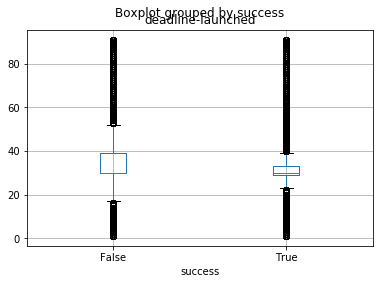

In [53]:
df.boxplot('deadline-launched', by='success')

In [54]:
kstest_by(df['deadline-launched'], df.success)

Ks_2sampResult(statistic=0.087192928806330339, pvalue=2.5921327632263751e-258)

For now I will assume this is correct test to perform on this distribution. Though it is clear we grouped by day, thus discretizing our samples, I believe we can reject H0: of no difference between successfull campaign distributions of time intervals. Both of these columns may be important to our model.

## Funding goal

In [55]:
print("There are %d unique funding goal values" % len(df.goal.unique()))

There are 4550 unique funding goal values


In [56]:
df.goal.describe()

count    1.565280e+05
mean     4.467307e+04
std      1.108518e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [57]:
df.goal.median()

5000.0

As expected this distribution is highly skewed.

In [58]:
kstest_by(df['goal'], df.success)

Ks_2sampResult(statistic=0.17193035531252077, pvalue=0.0)

Looks like this is the same result as above

In [59]:
df.static_usd_rate.describe()

count    156528.000000
mean          1.027985
std           0.192930
min           0.045635
25%           1.000000
50%           1.000000
75%           1.000000
max           1.716408
Name: static_usd_rate, dtype: float64

In [60]:
kstest_by(df['static_usd_rate'], df.success)

Ks_2sampResult(statistic=0.032825627899354282, pvalue=5.6299438965872303e-37)

I'm guessing this is some kind of exchange rate that is set, I'm assuming, at creation of project. This may be important

In [61]:
df.usd_pledged.describe()

count    1.565280e+05
mean     1.239698e+04
std      1.223180e+05
min      0.000000e+00
25%      5.000000e+01
50%      1.057000e+03
75%      5.505000e+03
max      2.033899e+07
Name: usd_pledged, dtype: float64

Pledged and usd_pledged is a feature that will not be available at prediction time and should therefore be left out of the modeling component. Let's look into the time components of the created, launched and deadline timestamps a bit more.

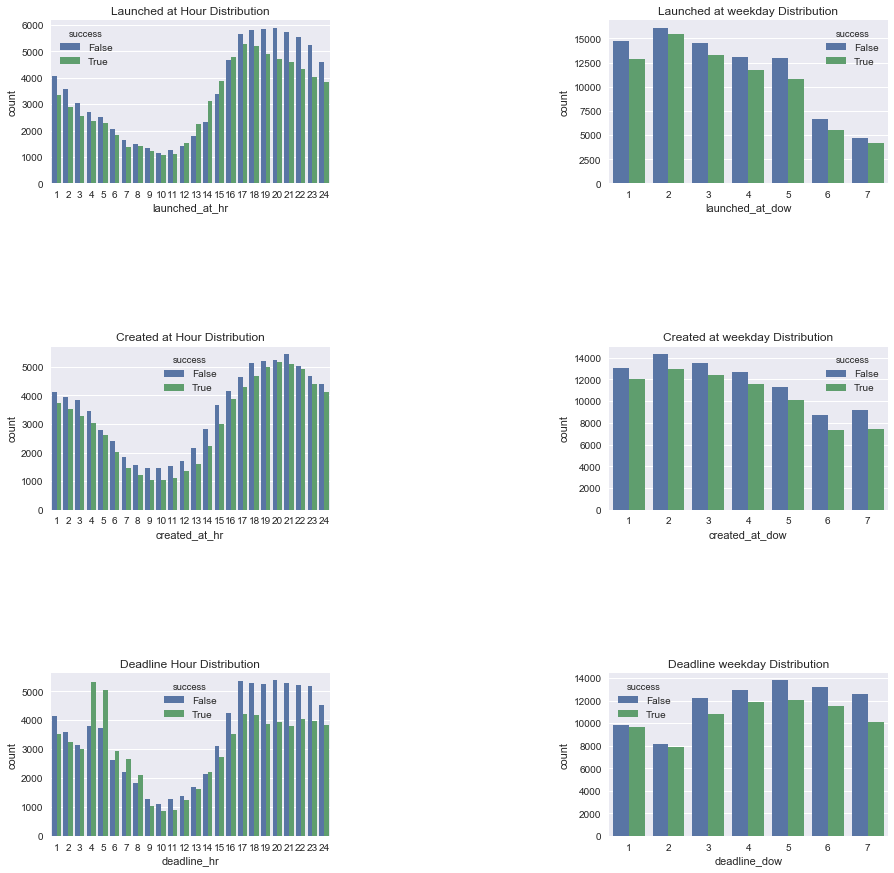

In [80]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace=1, wspace = 1)

sns.countplot(x="launched_at_hr", hue="success", data=df, ax=axes[0, 0]).set_title('Launched at Hour Distribution')
sns.countplot(x="created_at_hr", hue="success", data=df, ax=axes[1, 0]).set_title('Created at Hour Distribution')
sns.countplot(x="deadline_hr", hue="success", data=df, ax=axes[2, 0]).set_title('Deadline Hour Distribution')
sns.countplot(x="launched_at_dow", hue="success", data=df, ax=axes[0, 1]).set_title('Launched at weekday Distribution')
sns.countplot(x="created_at_dow", hue="success", data=df, ax=axes[1, 1]).set_title('Created at weekday Distribution')
sns.countplot(x="deadline_dow", hue="success", data=df, ax=axes[2, 1]).set_title('Deadline weekday Distribution')

From this data we an see somewhat of a difference between success and failure in the hour distributions. I think it's possible we can use these effects. Let's try to get the text feature lengths as well:

In [86]:
cleaner = CleanTextTransformer()

In [89]:
df['name'] = cleaner.fit_transform(df['name'])
df['blurb'] = cleaner.fit_transform(df['blurb'])

In [90]:
df['name_len'] = df.name.apply(lambda x: len(x))
df['blurb_len'] = df.blurb.apply(lambda x: len(x))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13ce1cf98>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1294529e8>], dtype=object)

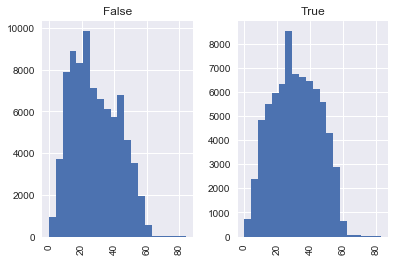

In [100]:
df.name_len.hist(bins=20, histtype='bar', by=df.success, stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13baf0588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12fe244e0>], dtype=object)

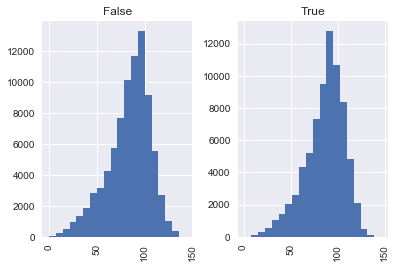

In [101]:
df.blurb_len.hist(bins=20, histtype='bar', by=df.success, stacked=True)

Neat!